In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#dir(prophet)

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving BNB-USD.csv to BNB-USD.csv
User uploaded file "BNB-USD.csv" with length 219247 bytes


In [ ]:
import io
df = pd.read_csv(io.StringIO(uploaded['BNB-USD.csv'].decode('utf-8')))
df= df.drop(columns = ['open','low','high','volume','close'])
df.head()

,timestamp,adjclose
0,2017-11-09 00:00:00,1.99077
1,2017-11-10 00:00:00,1.79684
2,2017-11-11 00:00:00,1.67047
3,2017-11-12 00:00:00,1.51969
4,2017-11-13 00:00:00,1.68662


In [ ]:
df['timestamp'] = pd.to_datetime(df["timestamp"])
df.set_index('timestamp', inplace = True)


Text(0, 0.5, 'price (in USD)')

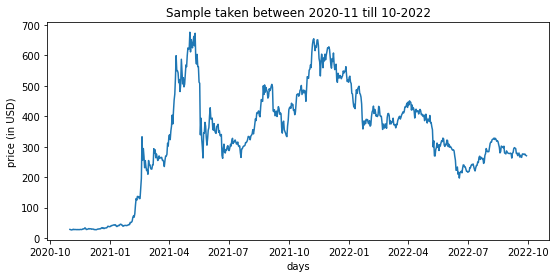

In [ ]:
plt.figure(figsize=(9,4))
df = df.loc['2020-11' : '2022']
plt.plot(df['adjclose'])
plt.title("Sample taken between 2020-11 till 10-2022" )
plt.xlabel("days")
plt.ylabel("price (in USD)")

In [ ]:
#df.columns = ['ds','y']
df['y']= np.round(df['adjclose'][:],1)
df['ds'] = df.index.values
a = np.arange(len(df))
df.set_index(a, inplace = True)

In [ ]:
df = df.drop(columns =['adjclose'])
df

,y,ds
0,28.5,2020-11-01 00:00:00
1,27.9,2020-11-02 00:00:00
2,26.9,2020-11-03 00:00:00
3,26.9,2020-11-04 00:00:00
4,27.7,2020-11-05 00:00:00
...,...,...
692,275.1,2022-09-24 00:00:00
693,274.1,2022-09-25 00:00:00
694,275.9,2022-09-26 00:00:00
695,272.4,2022-09-27 00:00:00


In [ ]:
df['ds'] = pd.to_datetime(df["ds"])

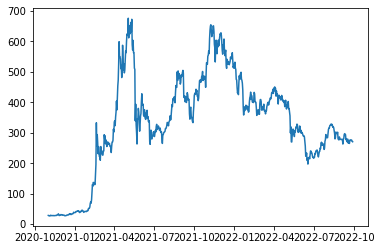

In [ ]:
plt.plot(df['ds'],df['y'])

In [ ]:
len(df)

697

In [ ]:

to_row = int(len(df)-210)
train  = df.iloc[:len(df)-210]
test = df.iloc[to_row:]
test

,y,ds
487,402.6,2022-03-03 00:00:00
488,374.3,2022-03-04 00:00:00
489,384.9,2022-03-05 00:00:00
490,375.0,2022-03-06 00:00:00
491,381.3,2022-03-07 00:00:00
...,...,...
692,275.1,2022-09-24 00:00:00
693,274.1,2022-09-25 00:00:00
694,275.9,2022-09-26 00:00:00
695,272.4,2022-09-27 00:00:00


In [ ]:
df.head()

,y,ds
0,28.5,2020-11-01
1,27.9,2020-11-02
2,26.9,2020-11-03
3,26.9,2020-11-04
4,27.7,2020-11-05


In [ ]:
df.tail()

,y,ds
692,275.1,2022-09-24 00:00:00
693,274.1,2022-09-25 00:00:00
694,275.9,2022-09-26 00:00:00
695,272.4,2022-09-27 00:00:00
696,270.3,2022-09-28 08:54:00


In [ ]:
# Initialize the Model
from prophet import Prophet
model= Prophet()
model.fit(train)
future = model.make_future_dataframe(periods = 210)
forecast = model.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp97n512fg/vva6_2nr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp97n512fg/7y6qa1c0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4386', 'data', 'file=/tmp/tmp97n512fg/vva6_2nr.json', 'init=/tmp/tmp97n512fg/7y6qa1c0.json', 'output', 'file=/tmp/tmp97n512fg/prophet_modelg8i29k5j/prophet_model-20230311190352.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:03:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:03:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
692,2022-09-24,318.595417,168.816771,469.647806,218.928922,418.044734,-1.476508,-1.476508,-1.476508,-1.476508,-1.476508,-1.476508,0.0,0.0,0.0,317.118909
693,2022-09-25,318.017872,169.433561,473.151716,217.930079,418.286916,0.751216,0.751216,0.751216,0.751216,0.751216,0.751216,0.0,0.0,0.0,318.769088
694,2022-09-26,317.440327,168.732382,478.251108,216.883495,418.530262,0.185116,0.185116,0.185116,0.185116,0.185116,0.185116,0.0,0.0,0.0,317.625443
695,2022-09-27,316.862782,162.816257,466.622367,215.547474,418.521403,0.593754,0.593754,0.593754,0.593754,0.593754,0.593754,0.0,0.0,0.0,317.456537
696,2022-09-28,316.285238,171.431912,476.798213,214.311854,418.990352,0.333297,0.333297,0.333297,0.333297,0.333297,0.333297,0.0,0.0,0.0,316.618534


In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()
future=pd.DataFrame(forecast,columns=['ds','yhat','yhat_lower','yhat_upper'])


In [ ]:
# from google.colab import files
# future.to_csv('BNB_predictions.csv', encoding = 'utf-8-sig')
# files.download('BNB_predictions.csv')

In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
692,2022-09-24,317.118909,168.816771,469.647806
693,2022-09-25,318.769088,169.433561,473.151716
694,2022-09-26,317.625443,168.732382,478.251108
695,2022-09-27,317.456537,162.816257,466.622367
696,2022-09-28,316.618534,171.431912,476.798213


In [ ]:
test.tail()

,y,ds
692,275.1,2022-09-24 00:00:00
693,274.1,2022-09-25 00:00:00
694,275.9,2022-09-26 00:00:00
695,272.4,2022-09-27 00:00:00
696,270.3,2022-09-28 08:54:00


In [ ]:
train.tail()

,y,ds
482,373.6,2022-02-26
483,360.5,2022-02-27
484,395.6,2022-02-28
485,408.5,2022-03-01
486,409.0,2022-03-02


In [ ]:
plot_plotly(model,forecast)

In [ ]:
validate = model.predict(test)
validate[['ds','yhat','yhat_lower','yhat_upper']].head(10)

,ds,yhat,yhat_lower,yhat_upper
0,2022-03-03,436.814940,321.305760,551.108484
1,2022-03-04,436.204867,319.925355,545.225324
2,2022-03-05,434.360516,330.896715,551.020331
3,2022-03-06,436.010695,315.372581,547.818817
4,2022-03-07,434.867050,321.591427,546.858230
5,2022-03-08,434.698144,320.471958,549.980909
6,2022-03-09,433.860141,316.964250,552.311535
7,2022-03-10,432.772126,317.951230,542.800013
8,2022-03-11,432.162053,332.765324,538.596380
9,2022-03-12,430.317702,316.428174,547.241414


In [ ]:
model_predictions= validate['yhat'].values
model_predictions


array([436.81493953, 436.2048672 , 434.36051574, 436.01069513,
       434.86705014, 434.69814358, 433.86014095, 432.77212551,
       432.16205317, 430.31770172, 431.96788111, 430.82423612,
       430.65532955, 429.81732692, 428.72931148, 428.11923915,
       426.27488769, 427.92506708, 426.7814221 , 426.61251553,
       425.7745129 , 424.68649746, 424.07642513, 422.23207367,
       423.88225306, 422.73860807, 422.56970151, 421.73169887,
       420.64368344, 420.0336111 , 418.18925964, 419.83943904,
       418.69579405, 418.52688748, 417.68888485, 416.60086941,
       415.99079708, 414.14644562, 415.79662501, 414.65298002,
       414.48407346, 413.64607083, 412.55805539, 411.94798305,
       410.1036316 , 411.75381099, 410.610166  , 410.44125943,
       409.6032568 , 408.51524136, 407.90516903, 406.06081757,
       407.71099696, 406.56735198, 406.39844541, 405.56044278,
       404.47242734, 403.86235501, 402.01800355, 403.66818294,
       402.52453795, 402.35563139, 401.51762876, 400.42

In [ ]:
testing_data= test['y'].values
testing_data.shape

(210,)

Model Validation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


#Method 1: Using R2 SCORE
print("Computing the R-squared value:")
r2_score = r2_score(testing_data,model_predictions)
print(f'r2_score:{r2_score}')

Computing the R-squared value:
r2_score:-0.35504070979991176


In [ ]:
# Method2: Report performance check with MEAN ABSOLUTE PERCENTAGE ERROR
MAPE = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data)) / np.abs(testing_data))
print(f'Mean_Absolute_Percentage_Error:{MAPE}')

Mean_Absolute_Percentage_Error:0.23581898316094352


In [ ]:
# Method3: Using MEAN ABSOLUTE ERROR
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(model_predictions,testing_data)
print(f'Mean_Absolute_Error:{MAE}')

Mean_Absolute_Error:63.2034787483469


In [ ]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(model_predictions,testing_data)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

77.63671548759362


Visualization of Results

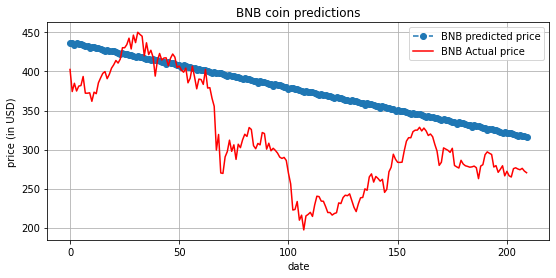

In [ ]:
plt.figure(figsize=(9,4))
plt.grid(True)
date_range = np.arange(len(testing_data))
#plt.plot(date_range, model_predictions[:-1],color='blue',marker='o',linestyle ='dashed',label = "ADA predicted price")
plt.plot(date_range,model_predictions,marker='o',linestyle ='dashed',label = "BNB predicted price")
plt.plot(date_range,testing_data,color='red',label = "BNB Actual price")
plt.title("BNB coin predictions")
plt.xlabel("date")
plt.ylabel('price (in USD)')
plt.legend()
plt.tight_layout
plt.show()

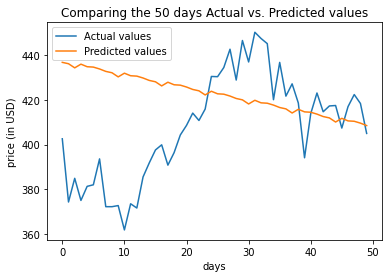

In [ ]:
plt.plot(testing_data[:50],label = 'Actual values')
plt.plot(model_predictions[:50], label = 'Predicted values')
plt.title('Comparing the 50 days Actual vs. Predicted values')
plt.xlabel('days')
plt.ylabel('price (in USD)')
plt.legend()
plt.show()

Model Validation of Forecasting of Next 10 days

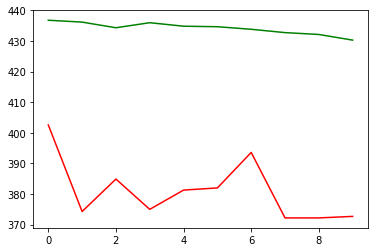

In [ ]:
Actual = testing_data[:10]
predicted = model_predictions[:10]
plt.plot(Actual, color='red')
plt.plot(predicted,color = 'green')

In [ ]:
# performance Evaluation of 10 days Predictions

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
print("Computing the R-squared value:")
r2_score = r2_score(Actual,predicted)
print(f'r2_score:{r2_score}')

Computing the R-squared value:
r2_score:-29.672863399910334


In [ ]:
# report performance
MAPE = np.mean(np.abs(np.array(predicted) - np.array(Actual)) / np.abs(Actual))
print(f'Mean_Absolute_Percentage_Error:{MAPE}')

Mean_Absolute_Percentage_Error:0.14007341565752285


In [ ]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(Actual, predicted)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

53.87314183784868


In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(predicted,Actual))

53.12682326678485
